<i>Alunos: Lara Destefani e Lucas Borges Pacheco</i>

### **Caracterização meteorológica da área de estudo**

A caracterização meteorológica serve como base para a compreensão dos mecanismos de movimentação e dispersão dos poluentes atmosféricos na área de estudo. Essa caracterização está intimamente relacionada à turbulência atmosférica, que é um dos principais mecanismos que controlam a dispersão de poluentes. A turbulência refere-se aos movimentos caóticos e irregulares do ar, com rápidas alterações de velocidade e direção, e pode ser dividida em dois tipos principais:
- **Turbulência Mecânica**: Gerada pela movimentação do ar sobre a superfície e suas interações com obstáculos físicos, como edificações e morros. Essas interações geram atrito e cisalhamento, resultando em turbulência.
- **Turbulência Térmica**: Gerada pelo gradiente de temperatura na atmosfera, que causa movimentos verticais do ar devido à convecção. A turbulência térmica é influenciada pelo perfil de temperatura, albedo das superfícies, razão de Bowen, pressão atmosférica e umidade do ar.

Ambos os tipos de turbulência desempenham papéis cruciais na dispersão de poluentes na atmosfera e na determinação da qualidade do ar em diferentes regiões. Assim como os fatores de emissão, as informações meteorológicas podem ser inseridas em modelos numéricos de dispersão de poluentes atmosféricos, permitindo estimar os impactos dessas emissões na concentração de poluentes na atmosfera. Dessa forma, a caracterização meteorológica desempenha um papel fundamental na gestão e preservação da qualidade do ar.

**Bibliotecas utilizadas no estudo**

In [10]:
import os
import numpy
import pandas
import warnings
from datetime import datetime
import matplotlib.pyplot as plt
from windrose import WindroseAxes
from siphon.simplewebservice.wyoming import WyomingUpperAir

warnings.filterwarnings('ignore')

##### **Meteorologia de superfície**

A meteorologia de superfície da área de estudo foi analisada utilizando dados meteorológicos de uma estação em Joinville, com coordenadas -26.22445 e -48.79736, obtidos no site do Professor Leonardo Hoinaski *(https://hoinaski.prof.ufsc.br/BRAIN/getMETAR)* ao longo do ano de 2023. A proximidade do local da estação da empresa Embraco justifica a utilização dessa estação.

O objetivo deste estudo é analisar especificamente a meteorologia em torno das atividades poluidoras realizadas pelas fontes estacionárias da empresa Embraco. Nesta primeira etapa do estudo, serão analisados dados das seguintes variáveis: temperatura, umidade, pressão, cobertura de nuvens, velocidade e direção do vento.

**Importação da tabela de dados da estação meteorológica**

In [3]:
root = os.path.dirname(os.getcwd()).replace('\\','/')
filepath = f'{root}/tabelas/metar.csv'
metar = pandas.read_csv(filepath,delimiter=',')
metar['Data'] = pandas.to_datetime(metar[['day','month','year','hour']])
metar = metar.rename(columns={
    'temp':'AirTemperature',
    'p':'AirPressure',
    'relh':'RelativeHumidity',
    'wd':'WindDirection',
    'ws':'WindSpeed',
    'cco':'CloudCoverage',
    'vis':'Visibility'})
metar = metar[['Data','WindDirection','WindSpeed','AirTemperature','AirPressure','CloudCoverage','RelativeHumidity']]
metar.head()

,Data,WindDirection,WindSpeed,AirTemperature,AirPressure,CloudCoverage,RelativeHumidity
0,2023-01-01 00:00:00,50.0,2.572220,26.0,1009.654835,6.0,78.62
1,2023-01-01 01:00:00,20.0,3.086664,26.0,1009.654835,6.0,78.62
2,2023-01-01 02:00:00,350.0,2.057776,25.0,1009.654835,6.0,83.44
3,2023-01-01 08:00:00,320.0,0.514444,21.0,1009.658428,NaN,100.00
4,2023-01-01 09:00:00,0.0,0.000000,22.0,1009.654835,1.0,94.06


**Séries temporais**


As séries temporais das variáiveis meteorológicas fornecem dados contínuos e detalhados sobre as condições meteorológicas na área de estudo. Essas informações permitem a modelagem dos poluentes atmoféricos, sendo inseridas como inputs ou dados de calibração, à depender da condução do estudo. Assim, as séries temporais permitem modelar com precisão a trajetória e a concentração dos poluentes, prever episódios de alta poluição e desenvolver estratégias eficazes de mitigação e controle ambiental.

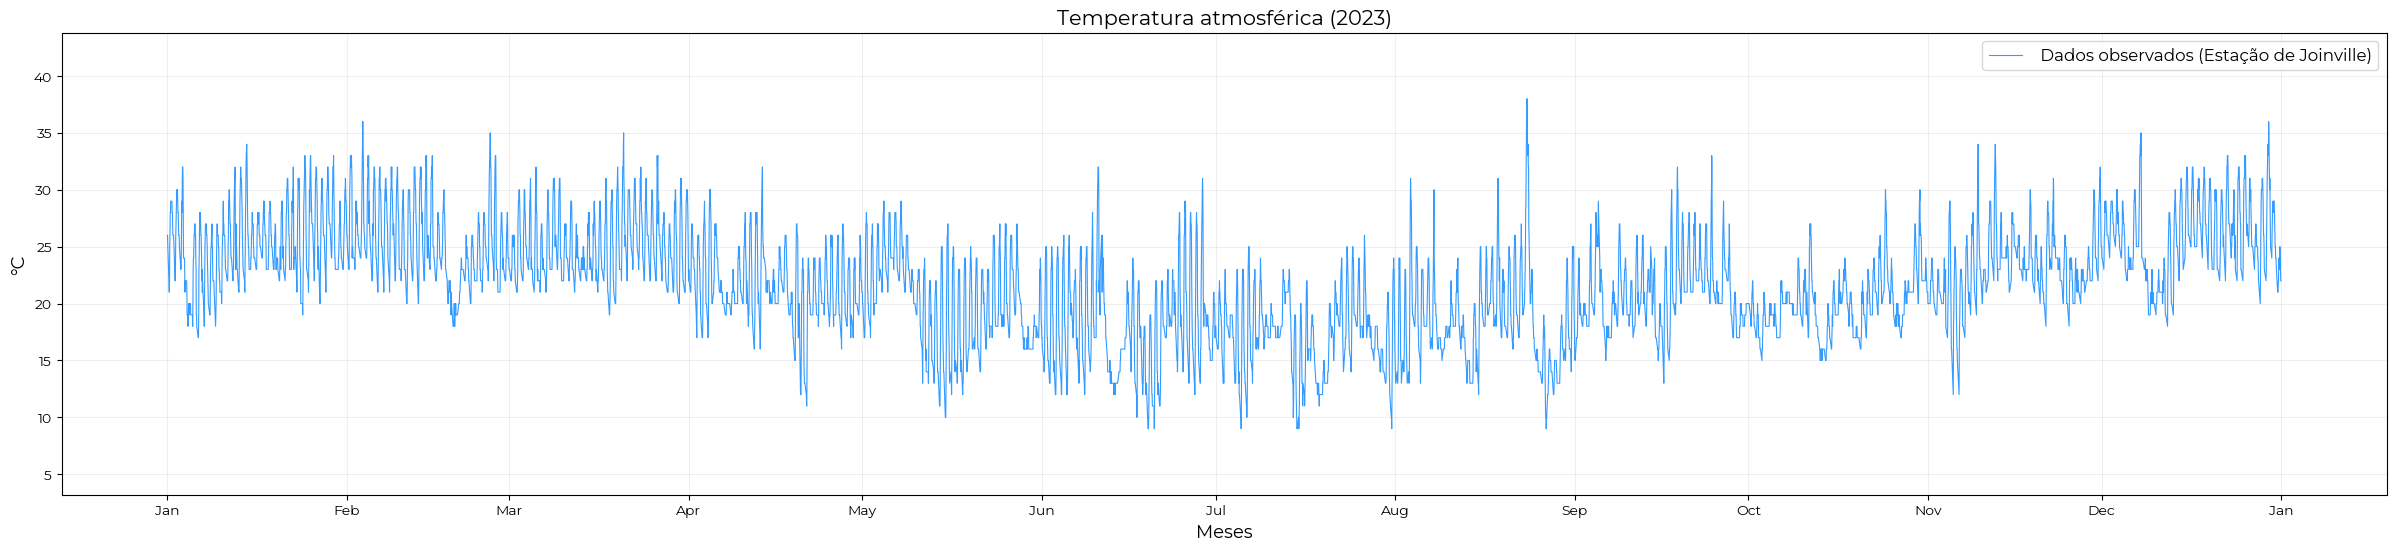

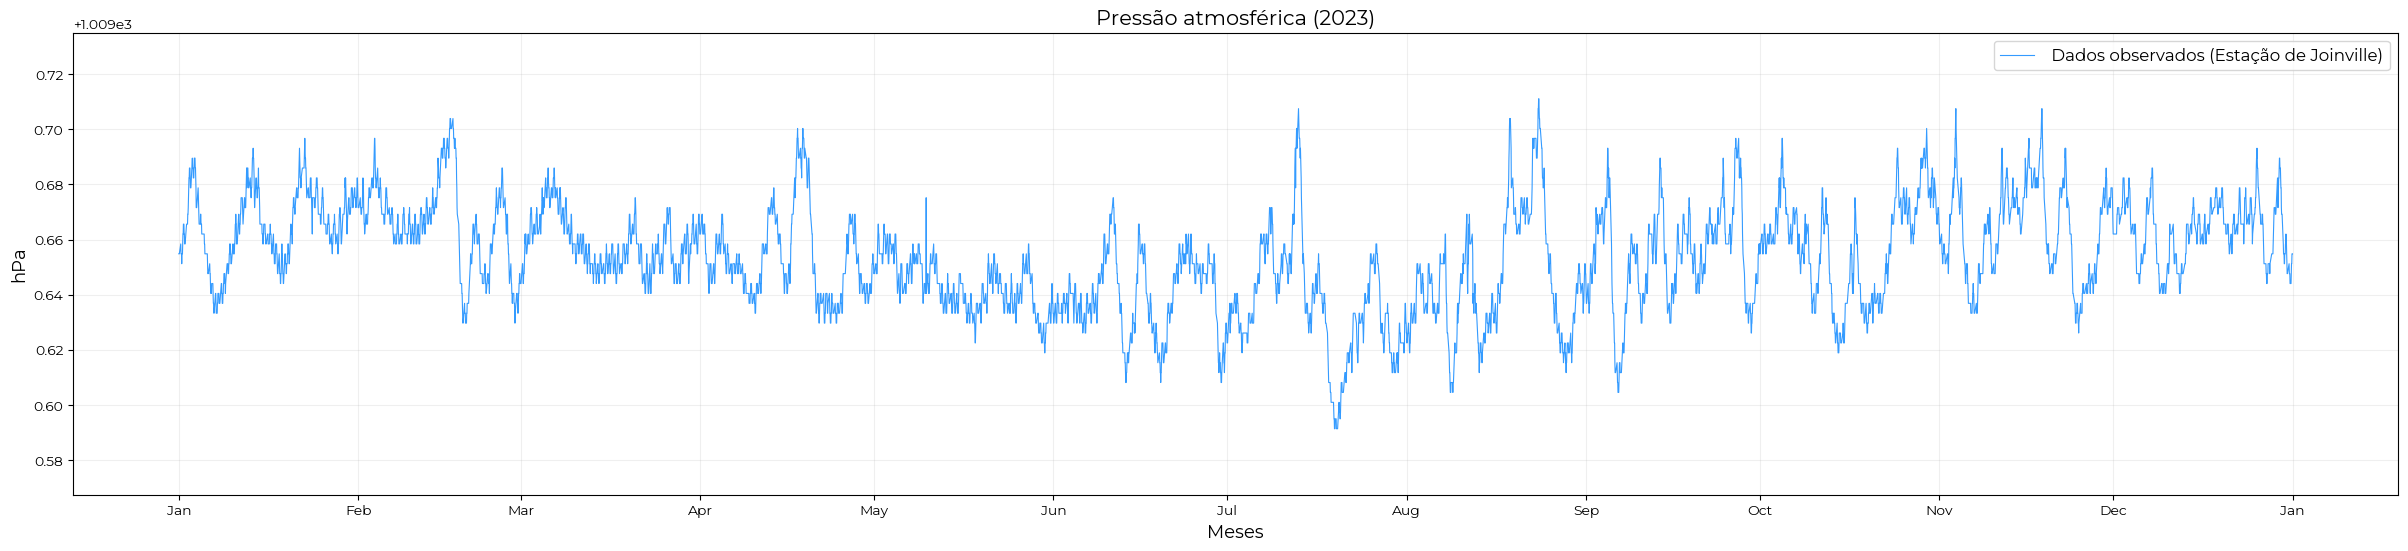

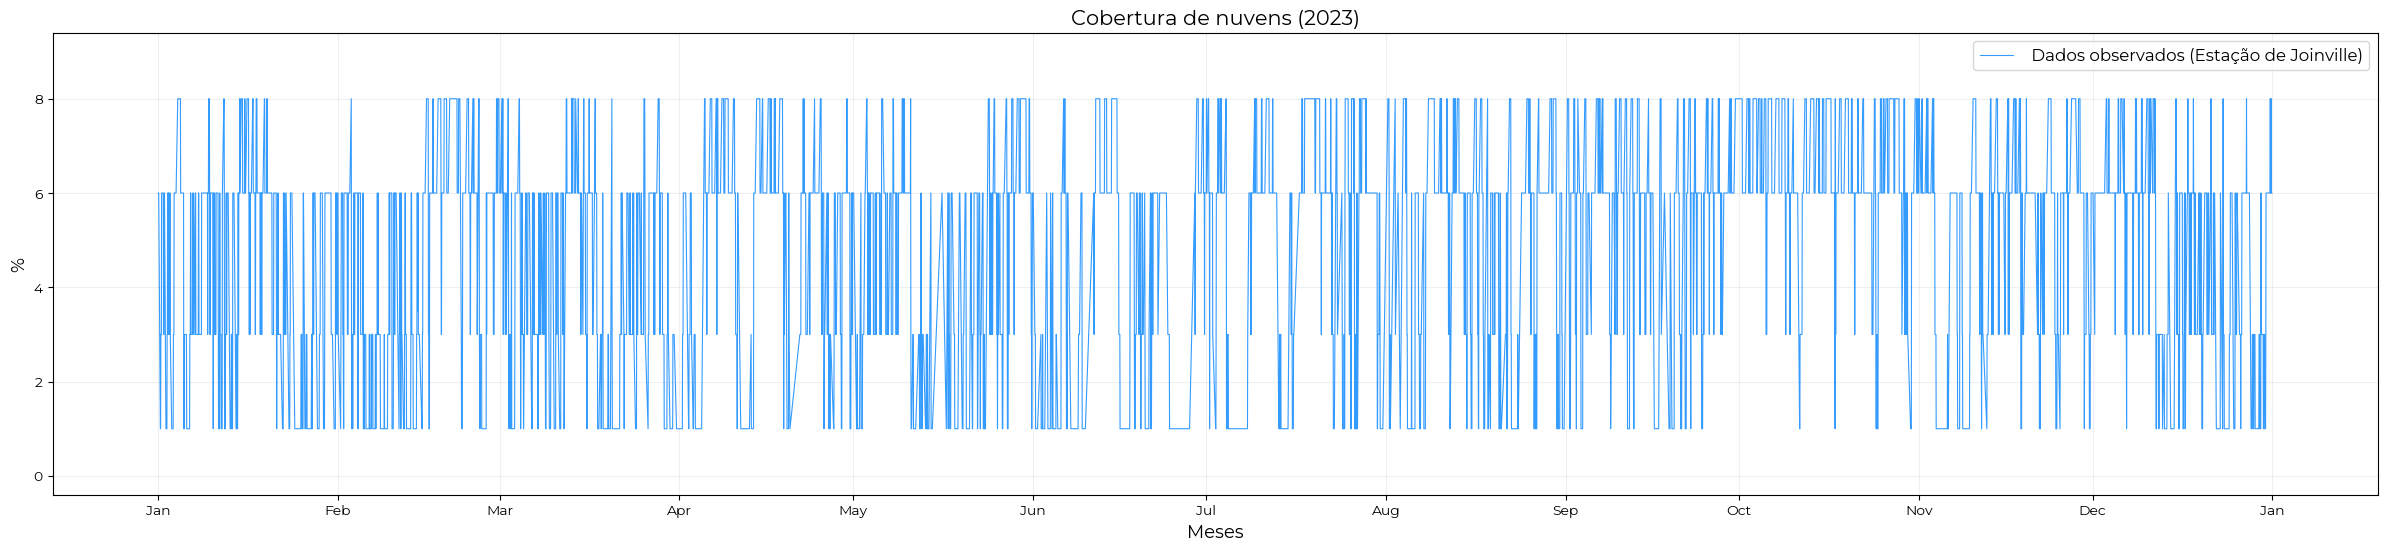

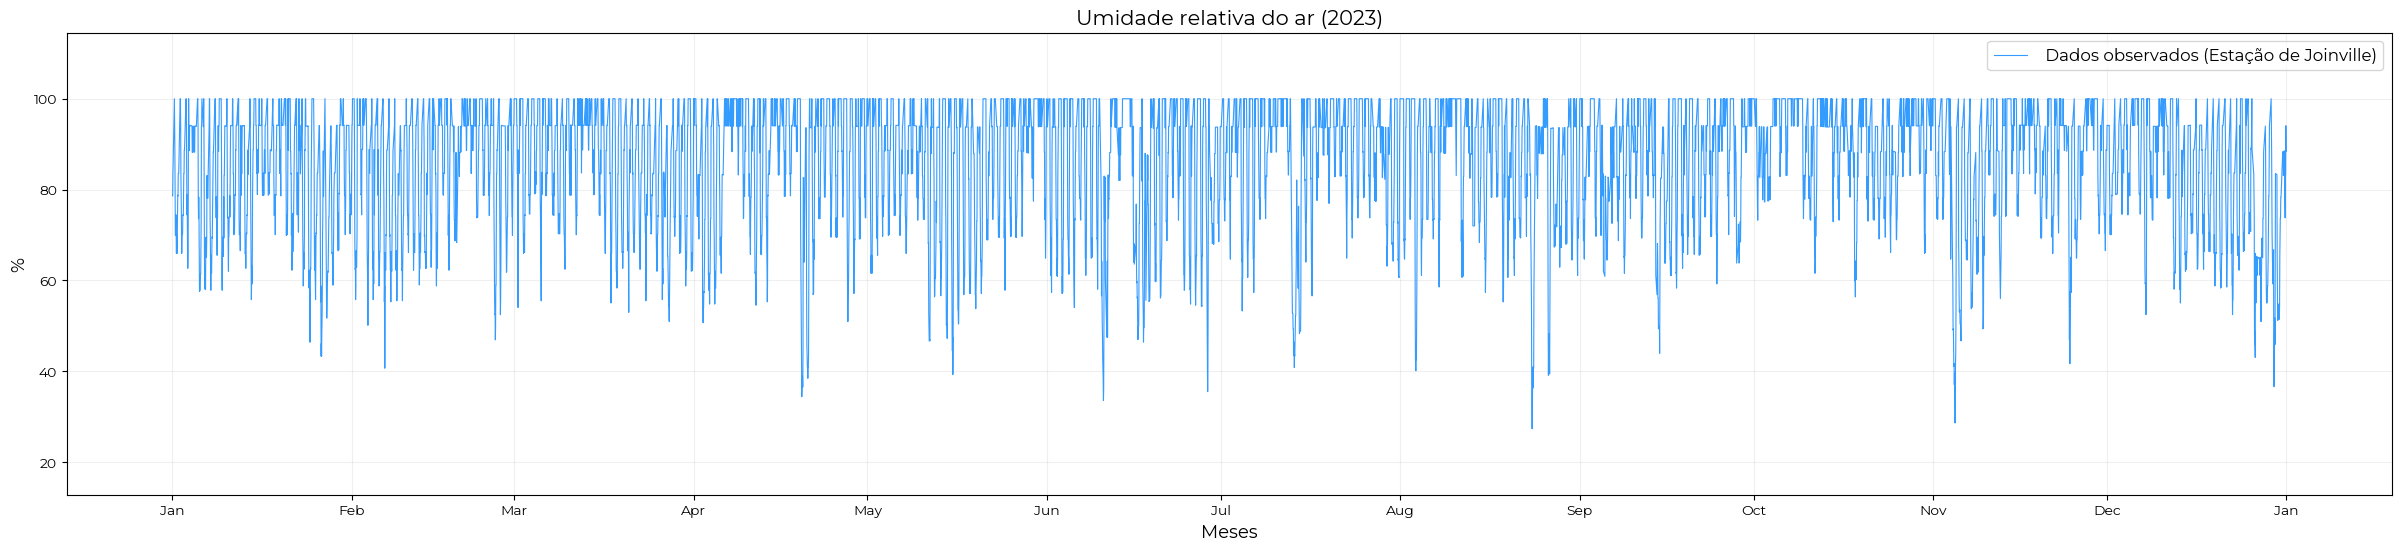

In [4]:
translate = {'AirTemperature':'Temperatura atmosférica',
             'AirPressure': 'Pressão atmosférica',
             'CloudCoverage':'Cobertura de nuvens',
             'RelativeHumidity':'Umidade relativa do ar',
             'WindSpeed':'Velocidade do vento',
             'WindDirection':'Direção do vento'}

units = {'AirTemperature':'°C','AirPressure':'hPa','CloudCoverage':'%','RelativeHumidity':'%'}

for i in ['AirTemperature','AirPressure','CloudCoverage','RelativeHumidity']:
    dados = metar.dropna(subset=i,axis=0) # Eliminação de dados vazios.
    plt.figure(figsize=(30,6))
    plt.rc('font',family='Montserrat')
    plt.plot(dados.Data,dados[i],color='dodgerblue',alpha=0.9,linewidth=0.8,label='Dados observados (Estação de Joinville)')
    plt.title(f'{translate[i]} (2023)', fontsize=15)
    plt.xlabel('Meses', fontsize=13)
    plt.ylabel(units[i], fontsize=13)
    plt.gca().xaxis.set_major_formatter(plt.matplotlib.dates.DateFormatter('%b'))
    plt.gca().xaxis.set_major_locator(plt.matplotlib.dates.MonthLocator())
    plt.grid(alpha=0.2)
    plt.legend(fontsize=12)
    plt.margins(y=0.2)
    plt.show()

**Análise de outliers com Boxplot**

Na análise descritiva, o **Boxplot** é uma representação gráfica que mostra a distribuição de um conjunto de dados, incluindo os quartis, a amplitude interquartil e os outliers. Os outliers são dados discrepantes que se destacam significativamente dos demais valores em um conjunto de dados. Eles podem ser causados por erros de medição, variações naturais ou eventos incomuns. A relevância deles deve ser analisada para definir se continuarão no dataset ou se devem ser tratados, pois se não forem relevantes, podem interferir significativamente nos resultados das análises.
- O retângulo é desenhado entre o primeiro e o terceiro quartil, representando a ampitude interquartil;
- A linha dentro da caixa representa a mediana;
- Os bigodes se estendem a partir da caixa até os valores extremos;
- Os pontos fora dos limites máximo e mínimo são considerados outliers.

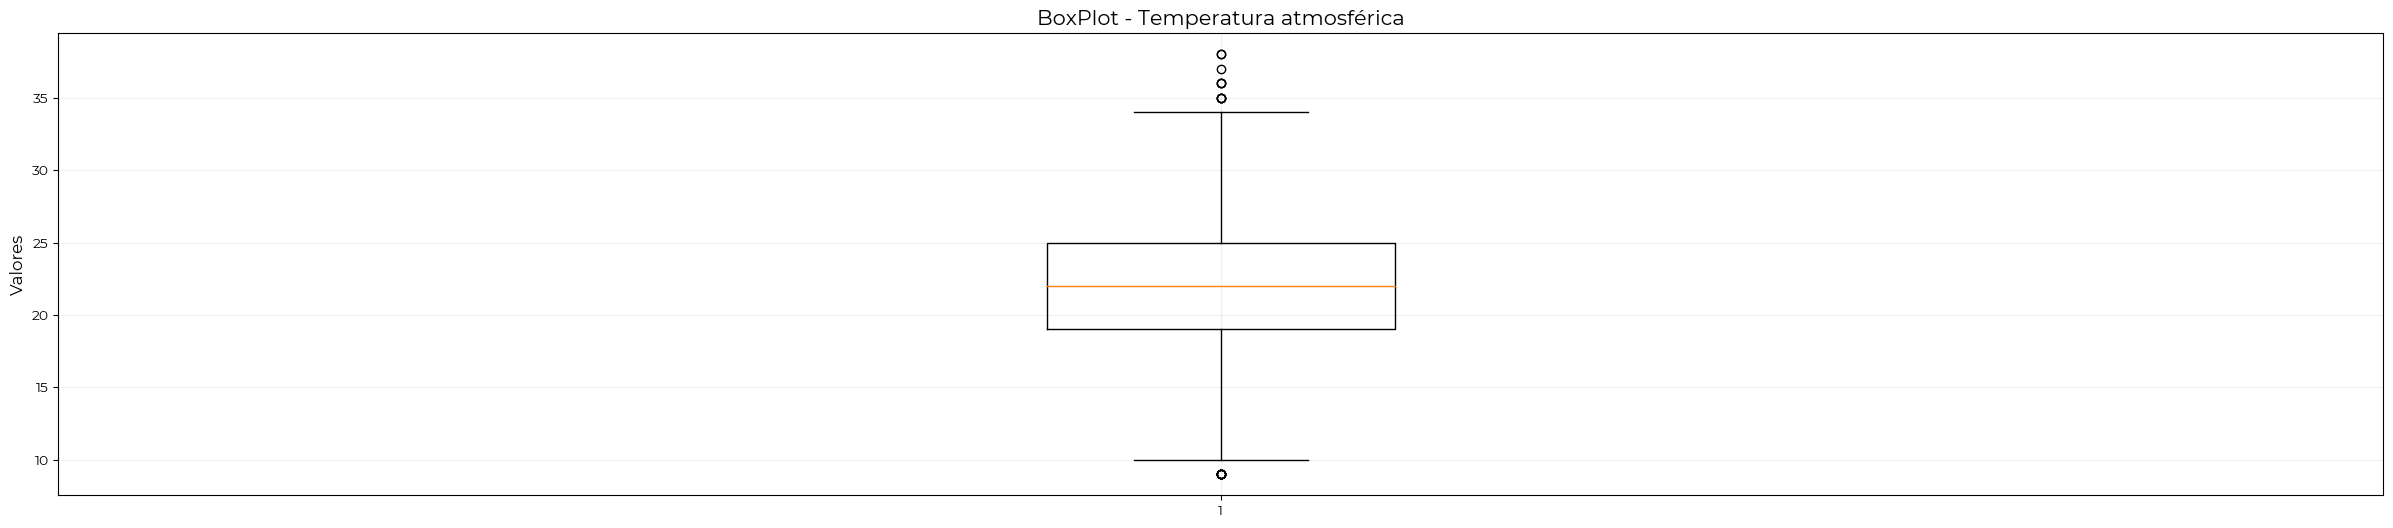

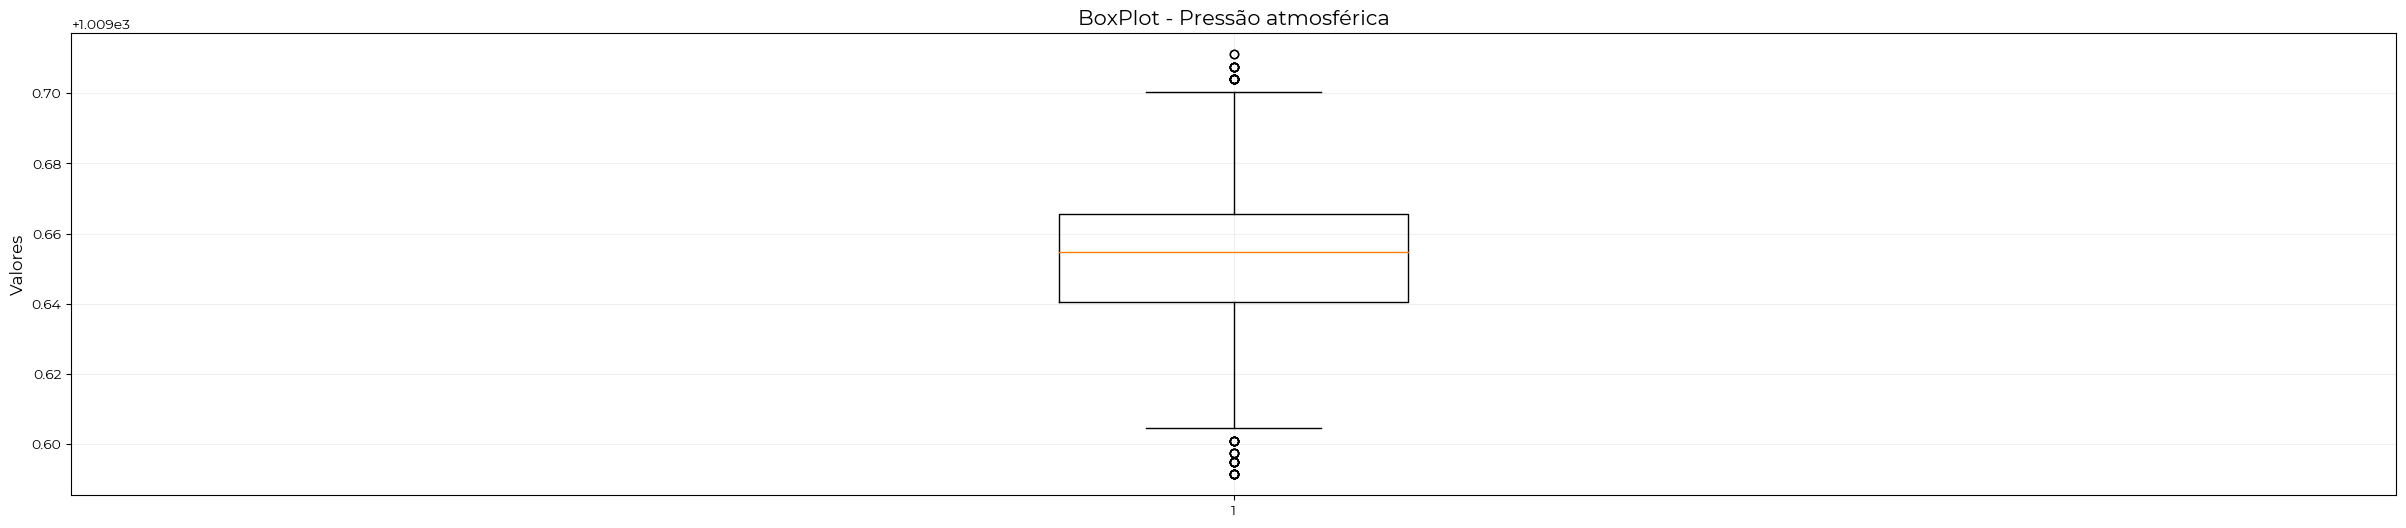

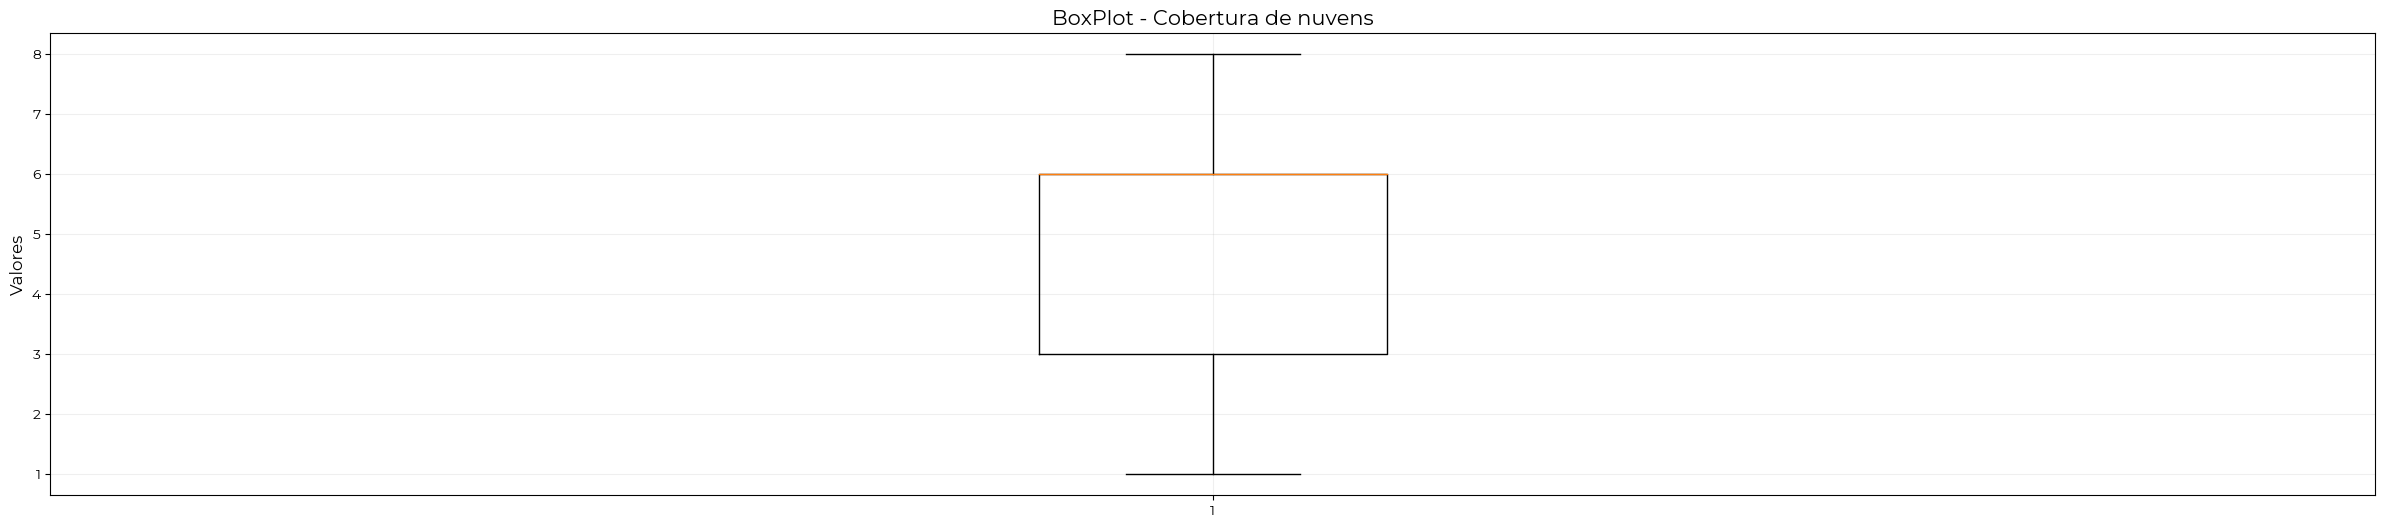

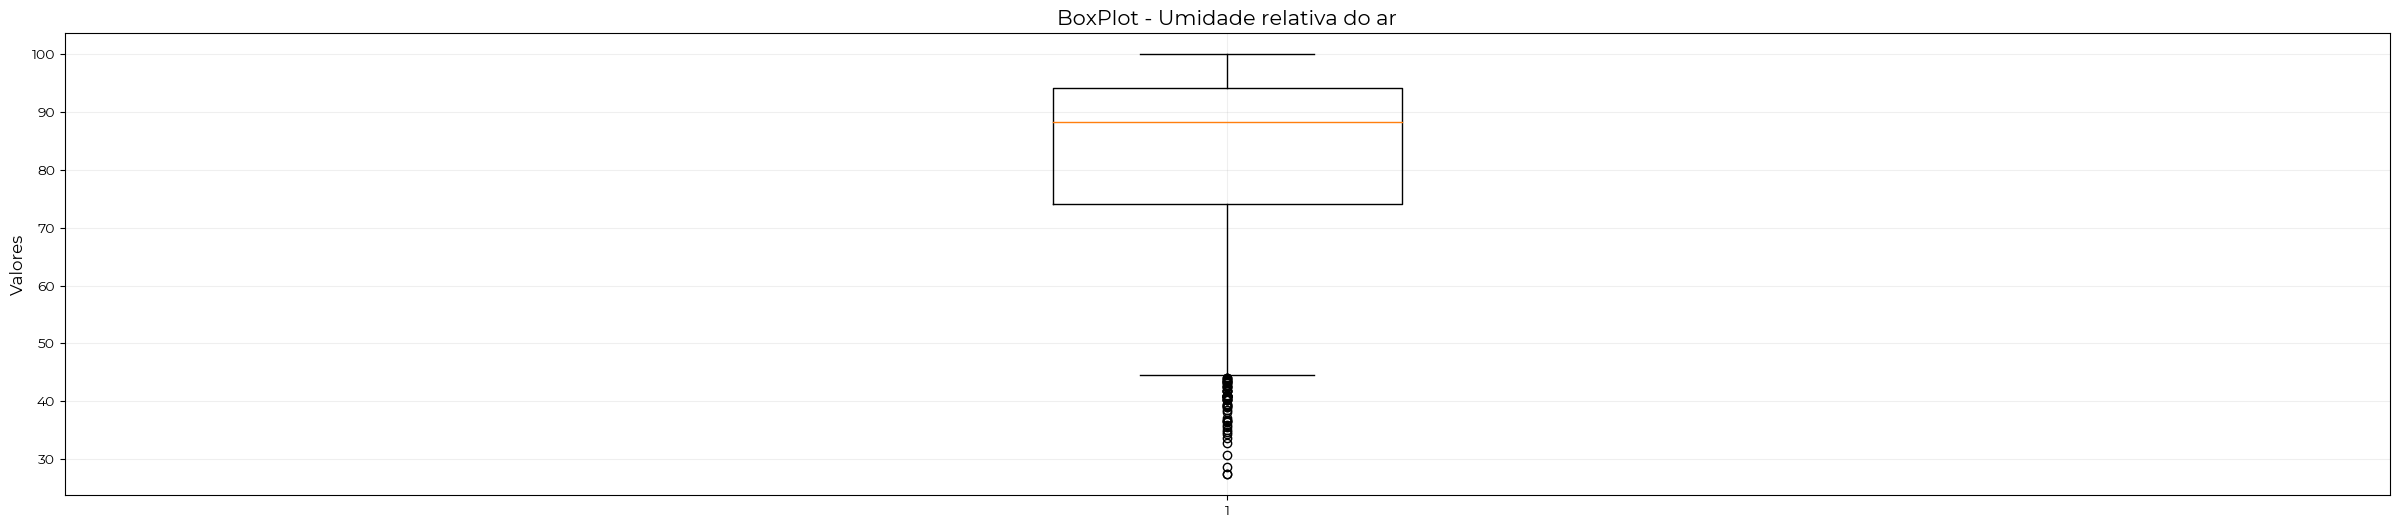

In [5]:
for i in ['AirTemperature','AirPressure','CloudCoverage','RelativeHumidity']:
    dados = metar.dropna(subset=i,axis=0)
    plt.figure(figsize=(30,6))
    plt.rc('font',family='Montserrat')
    plt.boxplot(dados[i])
    plt.title(f'BoxPlot - {translate[i]}',fontsize=15)
    plt.ylabel('Valores',fontsize=12)
    plt.grid(alpha=0.2)
    plt.show()

Para complementar, as medidas de tendência central e dispersão nos ajudam a entender onde os dados estão concentrados.

In [6]:
estatistics = round(metar[['AirTemperature','AirPressure','CloudCoverage','RelativeHumidity']].agg(['min', 'mean', 'max','median','std']),2)
estatistics

,AirTemperature,AirPressure,CloudCoverage,RelativeHumidity
min,9.00,1009.59,1.00,27.37
mean,22.17,1009.65,5.00,84.49
max,38.00,1009.71,8.00,100.00
median,22.00,1009.65,6.00,88.34
std,4.65,0.02,2.35,14.00


O tratamento de outliers com boxplot é uma abordagem eficaz para identificar e lidar com valores atípicos em um conjunto de dados. Ao observar um boxplot, é possível identificar pontos que estão além dos "bigodes" (linhas que se estendem a partir da caixa), indicando a presença de outliers. Uma vez identificados, os outliers podem ser tratados de diferentes maneiras, dependendo do contexto do problema e da natureza dos dados. Uma abordagem comum é remover os outliers do conjunto de dados, especialmente se forem causados por erros de medição ou valores extremamente incomuns que possam distorcer as análises estatísticas. No entanto, é importante exercer cautela ao remover outliers, pois isso pode afetar a interpretação dos resultados e a representatividade dos dados. 

Para o presente dataset, **não foram identificados outliers potencialmente significativos** que indicassem discrepâncias em relação à realidade do estudo. Portanto, decidiu-se não remover nenhum outlier, exceto os dados vazios.

**Máximos, médias e mínimos**

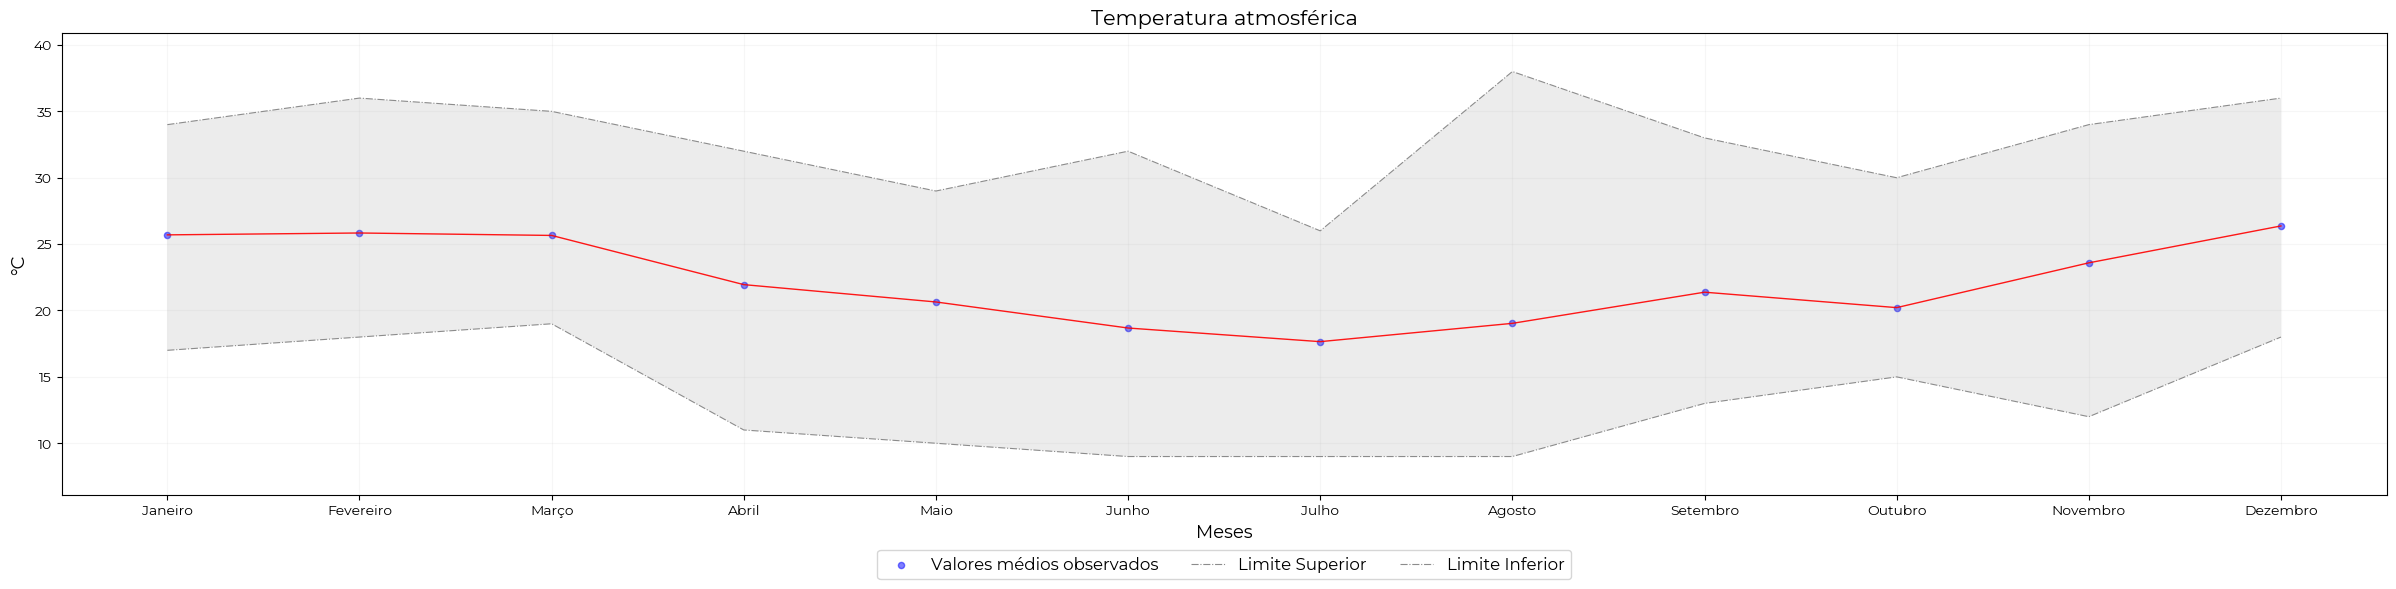

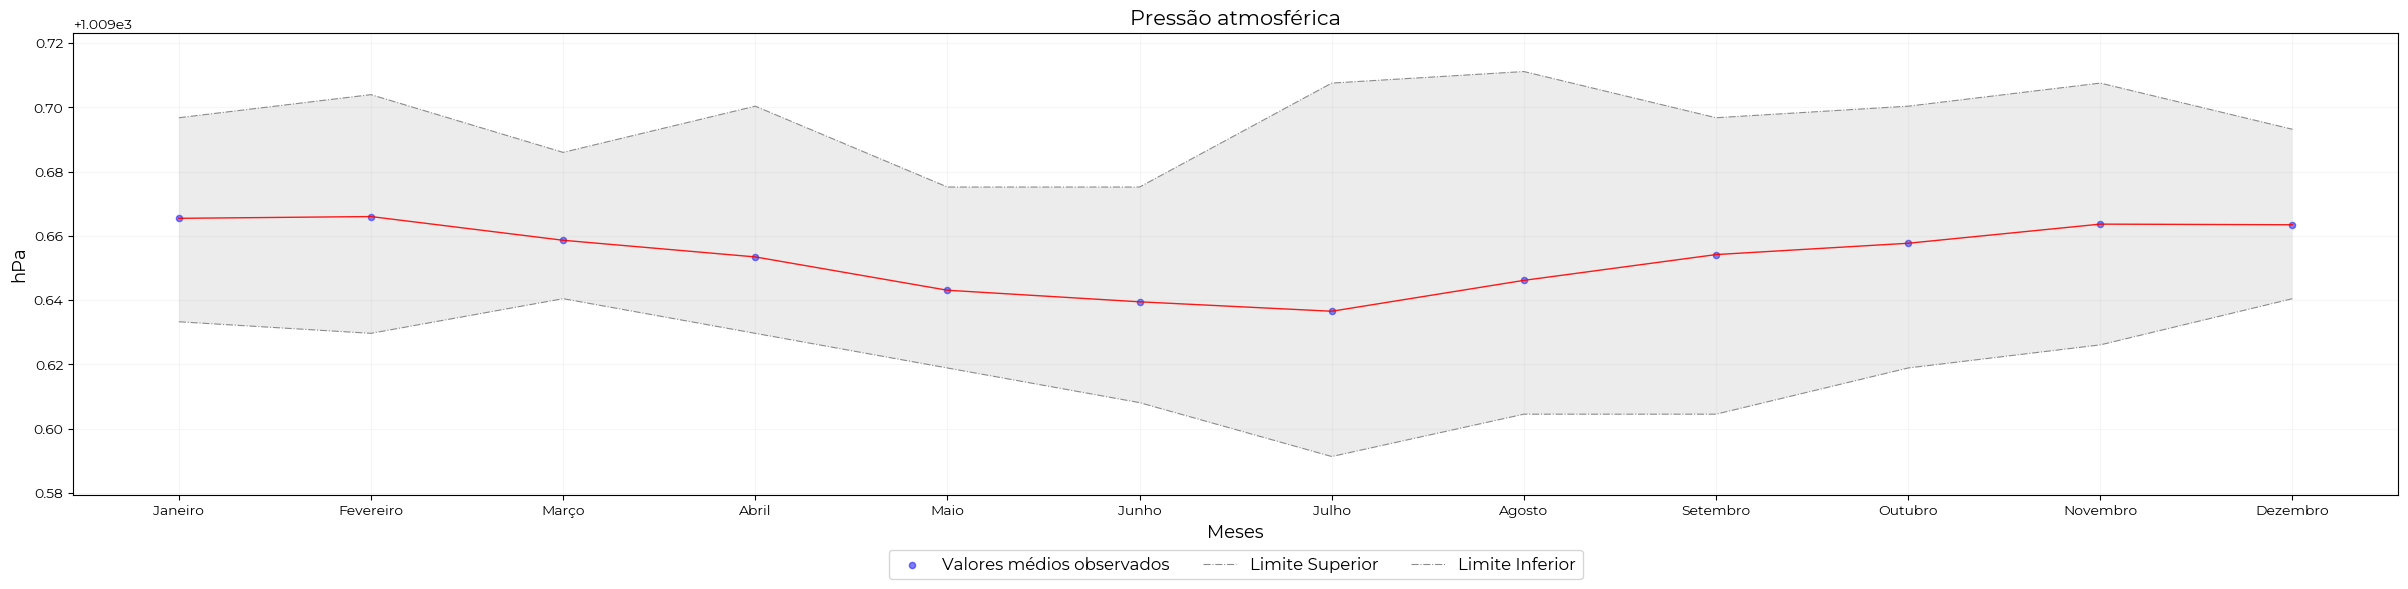

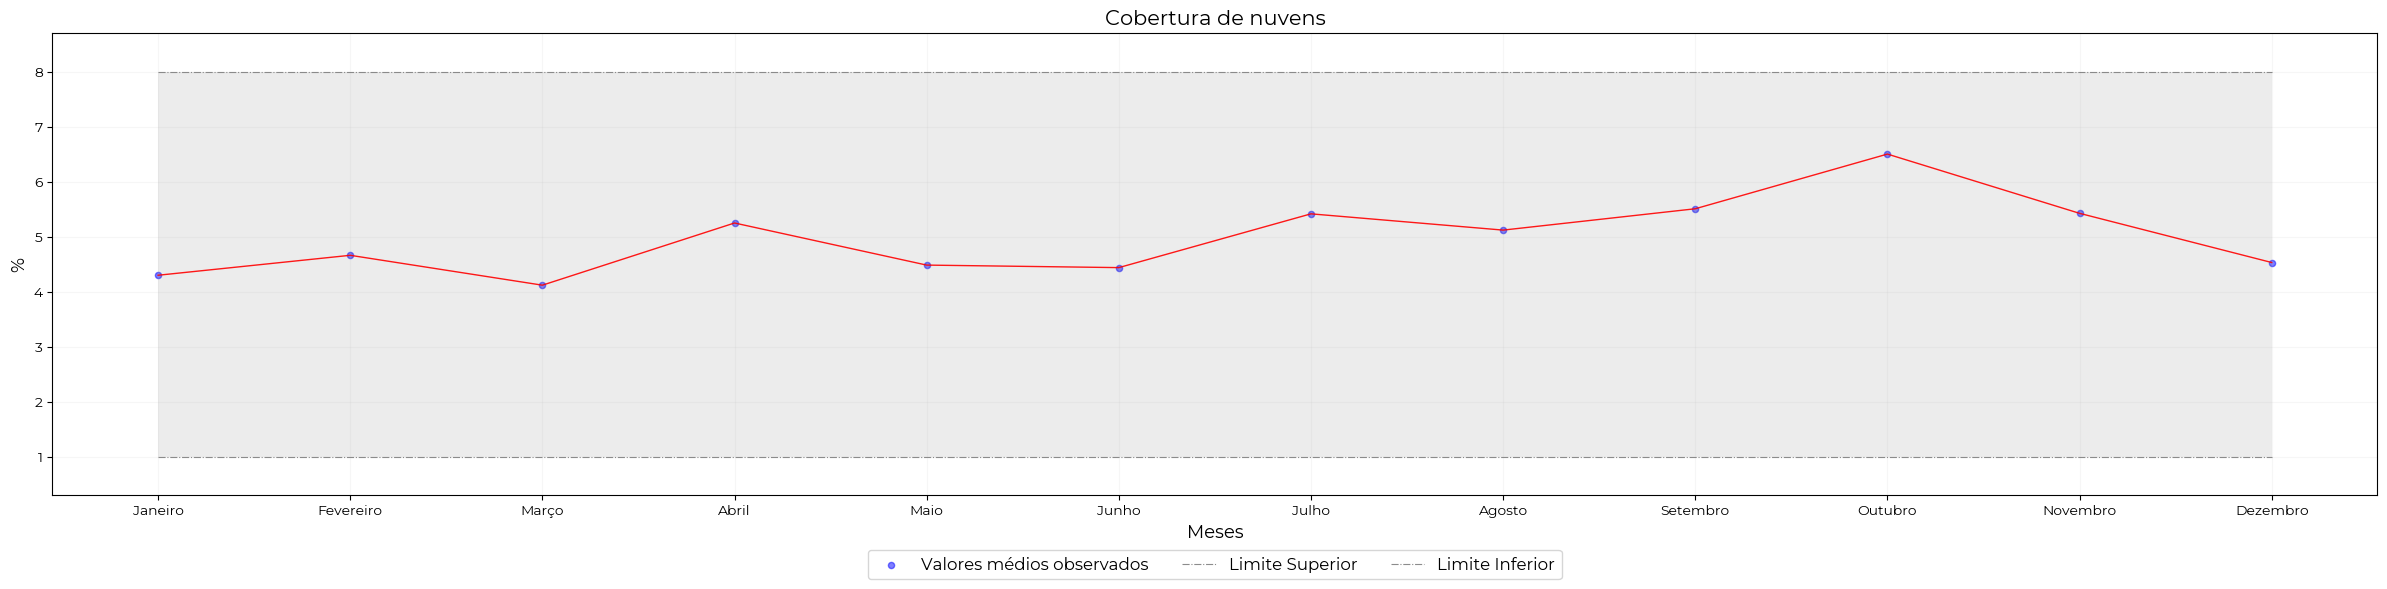

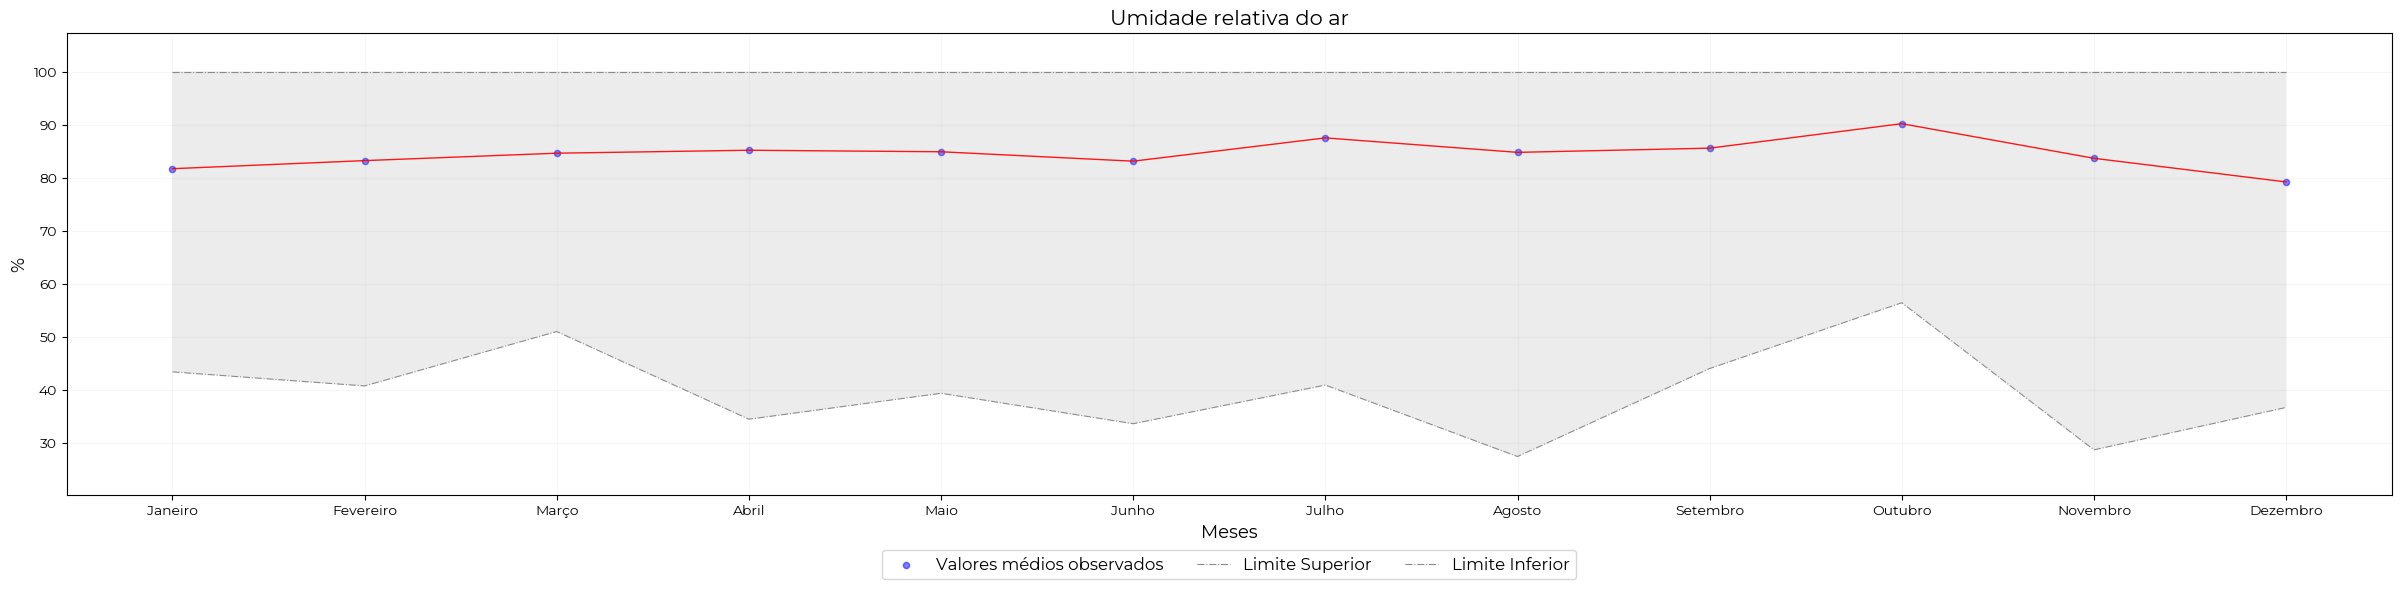

In [7]:
meses_pt = {1: 'Janeiro', 2: 'Fevereiro', 3: 'Março', 4: 'Abril', 
            5: 'Maio', 6: 'Junho', 7: 'Julho', 8: 'Agosto', 
            9: 'Setembro', 10: 'Outubro', 11: 'Novembro', 12: 'Dezembro'}

for i in ['AirTemperature','AirPressure','CloudCoverage','RelativeHumidity']:
    dados = metar.dropna(subset=i,axis=0) # Eliminação de dados vazios
    dados_agrupados = metar.resample(rule='M', on='Data')[i]

    plt.figure(figsize=(30,6))
    plt.rc('font',family='Montserrat')
    plt.scatter(dados_agrupados.mean().index.month.map(meses_pt), dados_agrupados.mean().values, color='blue', alpha=0.5, s=20, label = 'Valores médios observados')
    plt.plot(dados_agrupados.mean().index.month.map(meses_pt), dados_agrupados.mean().values, color='red', alpha=0.9, linewidth=1)
    plt.plot(dados_agrupados.max().index.month.map(meses_pt), dados_agrupados.max().values, color='gray', alpha=0.9, linewidth=0.8, linestyle='-.', label = 'Limite Superior')
    plt.plot(dados_agrupados.min().index.month.map(meses_pt), dados_agrupados.min().values, color='gray', alpha=0.9, linewidth=0.8, linestyle='-.', label = 'Limite Inferior')
    plt.fill_between(
            x = numpy.squeeze(dados_agrupados.mean().index.month.map(meses_pt)),
            y1 = numpy.squeeze(dados_agrupados.max().values),
            y2 = numpy.squeeze(dados_agrupados.min().values),
            facecolor='gray', alpha=0.15, linewidth=0)
    
    plt.title(translate[i], fontsize=15)
    plt.xlabel('Meses', fontsize=13)
    plt.ylabel(units[i], fontsize=13)
    plt.grid(alpha=0.1)
    plt.legend(fontsize=12,ncol=3,loc='center',bbox_to_anchor=(0.5, -0.15))
    plt.margins(y=0.1)
    plt.show()

**Rosas dos ventos**

A rosa dos ventos é uma representação gráfica que mostra a distribuição de frequência e direção dos ventos em um determinado local ao longo do tempo, onde o gradiente de cor de cada setor, representando uma direção cardinal e suas subdivisões, indica a intensidade com que o vento sopra naquela direção. 

Esta ferramenta permite identificar as direções predominantes do vento e suas intensidades, sendo essencial na modelagem da dispersão de poluentes atmosféricos para simular sua trajetória. Por isso, utiliza-se da rosa dos ventos para a  análise conjunta das variáveis do vento.

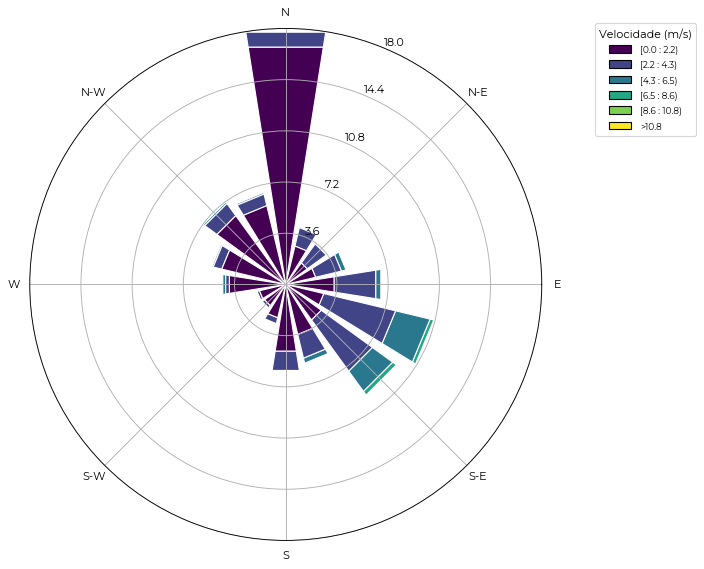

In [19]:
wind = metar[['Data','WindDirection','WindSpeed']].dropna()

ax = WindroseAxes.from_ax()
plt.rc('font',family='Montserrat')
ax.bar(wind['WindDirection'], wind['WindSpeed'], normed=True, opening=0.8, edgecolor="white")
ax.set_legend(title = 'Velocidade (m/s)', loc='center right', bbox_to_anchor=(1.3,0.9))
plt.show()

No presente estudo, observa-se a predominância de ventos nos quadrantes **norte** e **sudoeste**, que são os ventos predominantes no estado de Santa Catarina.

**Discussão sobre as condições meteorológicas locais e possíveis reflexos na qualidade do ar**

Ao analisar as condições na área circundante à empresa, observa-se que o bairro Pirabeiraba, em Joinville, está localizado ao norte da fonte de emissão. Nesse contexto, eventos meteorológicos com vento sul podem representar potenciais riscos para essa região devido à sua proximidade com a fonte. Por outro lado, a maior parte de Joinville encontra-se a sudeste da empresa, tornando os ventos provenientes do quadrante norte potencialmente prejudiciais para essa área. Essa configuração geográfica destaca a importância de considerar os padrões de vento ao avaliar os possíveis impactos da emissão de poluentes atmosféricos na região.